In [118]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
sys.path.insert(1, oj(sys.path[0], '../vision_analyze'))  # insert parent path
import time
import numpy as np
from tqdm import tqdm
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

from torch import optim
from torch import nn
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


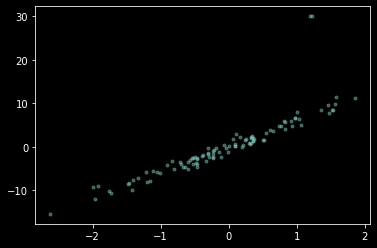

In [119]:
n = 100
p = 1
w = 6
eps = 1

np.random.seed(42)
X = np.random.randn(n, p)
y = w * X + np.random.randn(n, 1) * eps

# add outliers
xs = np.array([1.23, 1.20]).reshape(1, -1).T
ys = np.array([30, 30]).reshape(1, -1).T
X = np.vstack((X, xs))
y = np.vstack((y, ys))

plt.plot(X, y, '.', alpha=0.4)
plt.show()

In [114]:
class MLPRegressor(nn.Module):
    '''Pytorch MLP Regressor
    '''
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 100)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(100, 100)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(100, 1)
        

    def forward(self, x: torch.Tensor):
        x = self.fc1(x)
        x = self.relu1(x)
#         x = self.fc2(x)
#         x = self.relu2(x)
#         x = self.fc3(x)
#         x = self.relu3(x)
        x = self.fc4(x)
        return x

    def predict(self, X: np.ndarray):
        X = torch.Tensor(X)
        return self.forward(X).cpu().detach().numpy()
    
    def fit(self, X: np.ndarray, y: np.ndarray, epochs=100, lr=1e-3):
        X = torch.Tensor(X)
        y = torch.Tensor(y)
#         optimizer = optim.SGD(self.parameters(), lr=lr)
        optimizer = optim.Adam(self.parameters(), lr=lr)
        running_loss = 0.0
        for i in tqdm(range(epochs)):
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            preds = self.forward(X)
            loss = torch.mean((preds - y)**2) #nn.MSELoss(preds, y)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % epochs // 3 == 0:    # print every 2000 mini-batches
                print(f'{i} {running_loss:0.2f}\t', end='')
                running_loss = 0.0

np.random.seed(11)
torch.manual_seed(11)
lr = 3e-2
epochs = 800
num_models = 10
m1 = MLPRegressor(input_dim=X.shape[1])
m1.fit(X, y, epochs=epochs, lr=lr)
preds = m1.predict(X)


ms = []
ys = []
ms.append(m1)
ys.append(preds)
for i in range(num_models):
    m = MLPRegressor(input_dim=X.shape[1])
    m.fit(X, preds, epochs=epochs, lr=lr)
    preds = m.predict(X)
    ms.append(deepcopy(m))
    ys.append(deepcopy(preds))

 15%|█▌        | 122/800 [00:00<00:01, 611.08it/s]

0 50.96	1 42.09	2 34.54	

 26%|██▌       | 209/800 [00:00<00:00, 1010.46it/s]

0 40.89	1 31.94	2 24.20	

 17%|█▋        | 133/800 [00:00<00:01, 661.96it/s]

0 41.80	1 34.64	2 28.23	

 17%|█▋        | 135/800 [00:00<00:00, 670.51it/s]

0 43.07	1 33.93	2 26.10	

 16%|█▋        | 132/800 [00:00<00:01, 654.14it/s]

0 47.53	1 36.79	2 27.60	

 15%|█▍        | 119/800 [00:00<00:01, 612.11it/s]

0 42.56	1 32.87	2 24.50	

 16%|█▌        | 127/800 [00:00<00:01, 640.70it/s]

0 40.99	1 31.02	2 22.45	

 17%|█▋        | 133/800 [00:00<00:01, 661.94it/s]

0 39.99	1 31.74	2 24.47	

 16%|█▌        | 124/800 [00:00<00:01, 604.71it/s]

0 37.08	1 28.05	2 20.48	

 14%|█▍        | 114/800 [00:00<00:01, 554.02it/s]

0 42.75	1 33.46	2 25.57	

 16%|█▌        | 125/800 [00:00<00:01, 609.87it/s]

0 41.20	1 31.73	2 23.41	

100%|██████████| 800/800 [00:01<00:00, 706.43it/s]


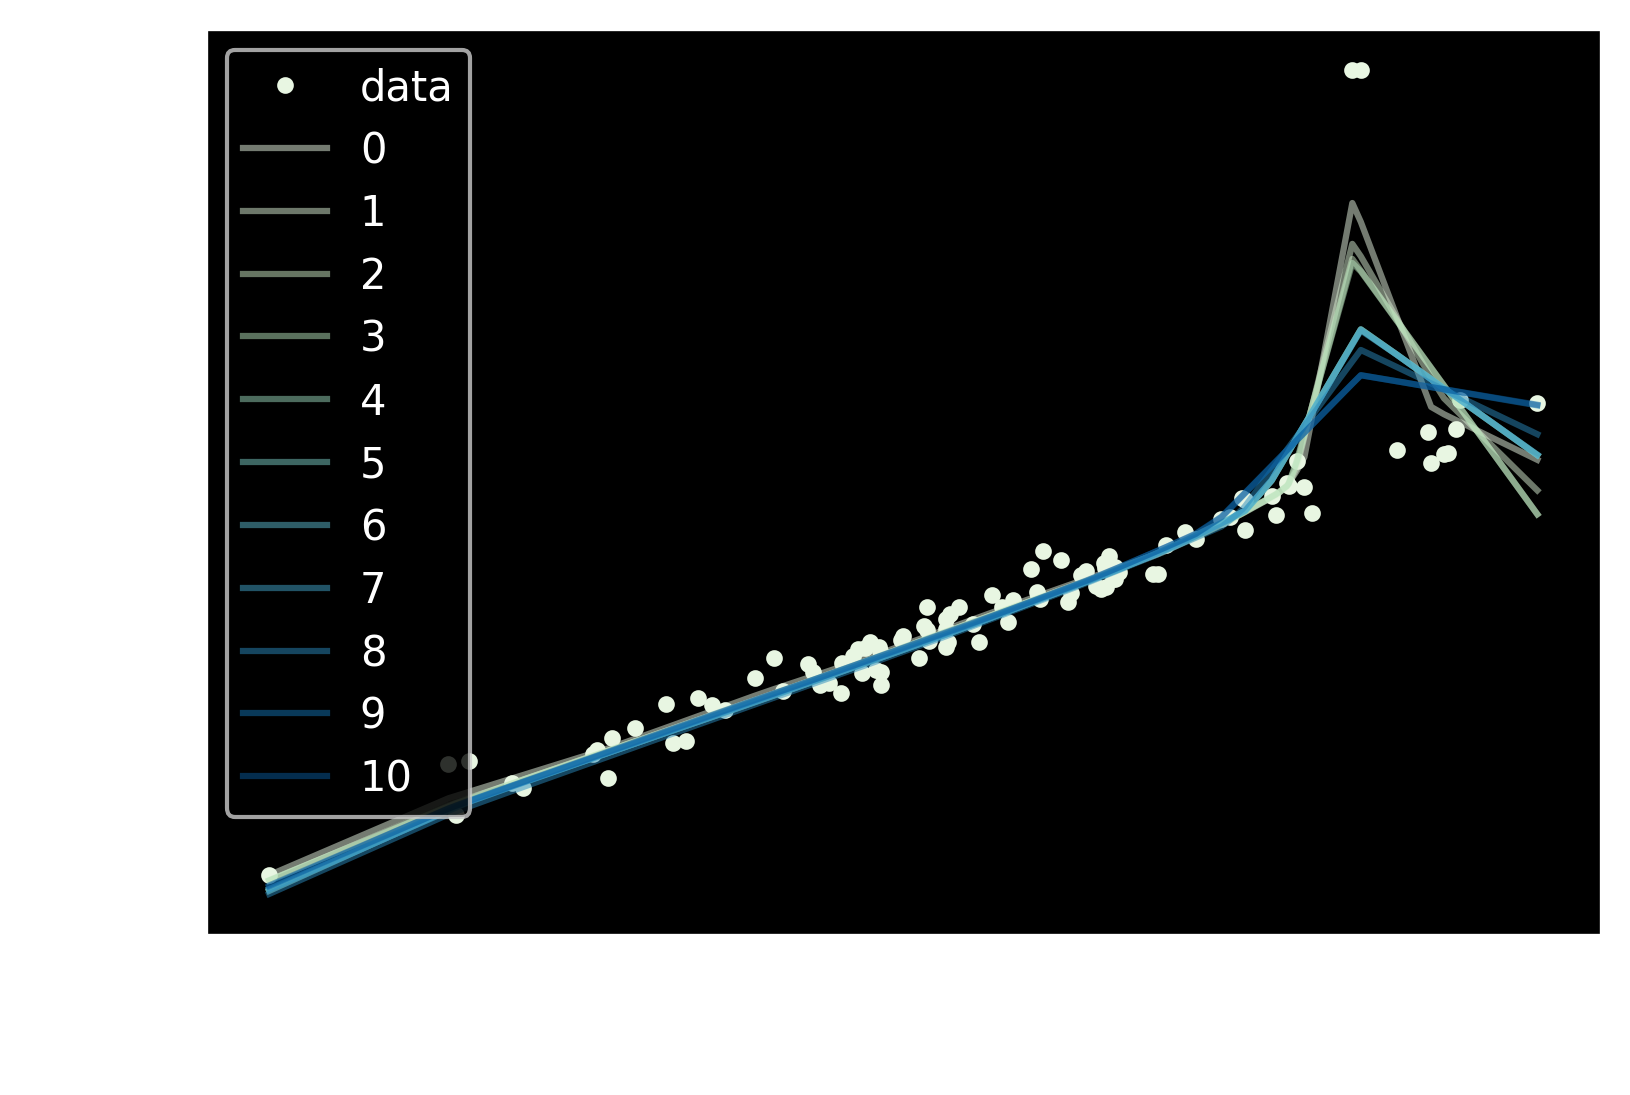

In [117]:
plt.figure(dpi=300)
args = np.argsort(X.flatten()).flatten()
colors = sns.color_palette("GnBu", len(ys))
plt.plot(X, y, '.', label='data', color=colors[0])
for i in range(len(ys)):
    plt.plot(X[args], ys[i][args], '-', label=i, alpha=0.5, markeredgewidth=0, color=colors[i])
plt.ylabel('y')
plt.xlabel('feature')
plt.legend()
plt.show()